In [12]:
from signal_utils import *
import scipy

# Real Signal

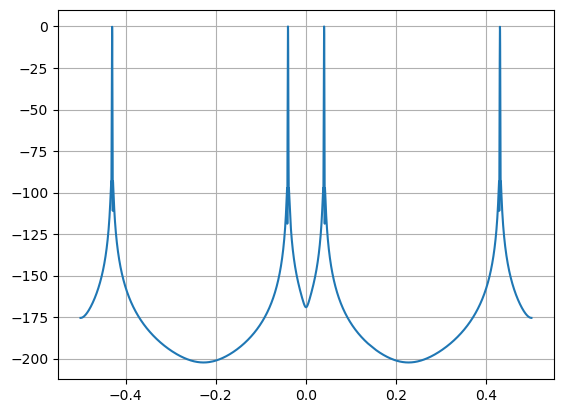

In [17]:
N = 2**12
n = np.arange(N)
F1 = 0.04
F2 = 0.43
x_test = 1.0*np.sin(2*np.pi*F1*n) + 1.0*np.sin(2*np.pi*F2*n)
x_test /= np.max(x_test)

np.savetxt("../../../../VHDL/data/fir_test/xin_test.txt", x_test, fmt="%.12f")

freqs_test, xfftdB_test, an_ = fftdB(x_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

83


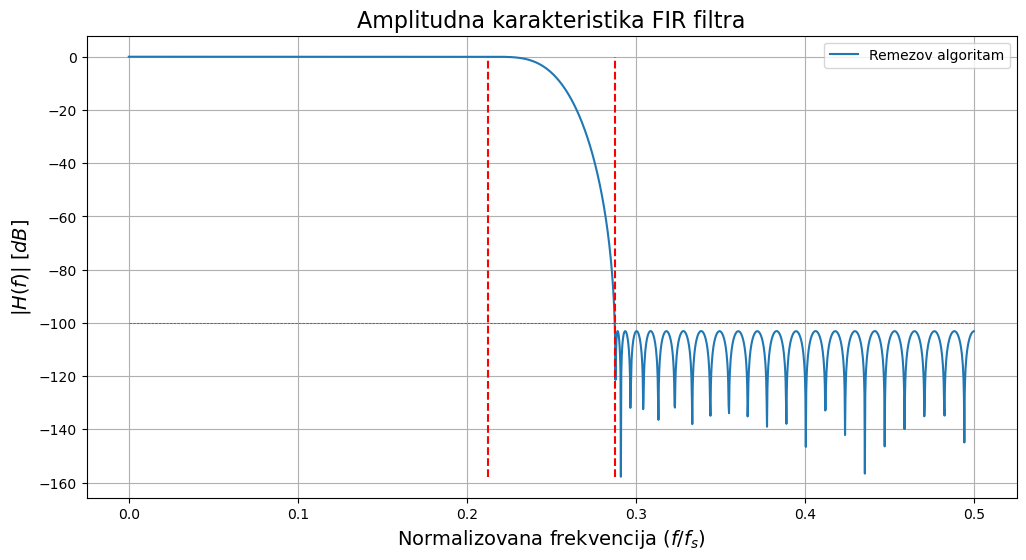

In [19]:
AdB = 100
deltaPass = 10**(-AdB/20)
deltaStop = deltaPass

perc = 0.15
Fmax = 0.5 * (1 - perc)
Fpass = Fmax/2
Fstop = (1-Fmax)/2


firCoeff = remezlp(Fpass, Fstop, deltaPass, deltaStop, even_n = False, nPoints=N, Nmax=N)

np.savetxt("../../../../VHDL/data/fir_test/firCoeffs.txt", firCoeff, fmt="%.12f")
print(len(firCoeff))

w, h = scipy.signal.freqz(firCoeff, worN=len(x_test)//2)
H = 20*np.log10(abs(h))
H -= np.max(H)
H_full = np.concatenate((H[::-1], H))

plt.figure(figsize=(12,6))
plt.plot(w/(2*np.pi), H, label="Remezov algoritam");
# plt.plot(w_hb/(2*np.pi), H_hb, label="HB korekcija");
plt.plot([0, 0.5], [-AdB, -AdB], 'r--', linewidth=0.5)
plt.plot([Fpass,Fpass], [np.min(H), 0], 'r--');
plt.plot([Fstop,Fstop], [np.min(H), 0], 'r--');
plt.legend()
plt.title(r'Amplitudna karakteristika FIR filtra', fontsize=16)
plt.xlabel(r'Normalizovana frekvencija ($f/f_s$)', fontsize=14)
plt.ylabel(r'$|H(f)| \ [dB]$', fontsize=14)
plt.grid(True)
plt.show();

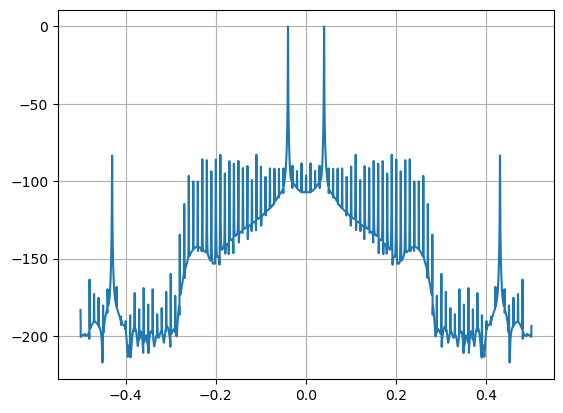

In [22]:
xout_test = np.loadtxt("../../../../VHDL/data/fir_test/xout_test.txt", dtype=np.int32)

freq_test, xfftdB_test, an = fftdB(xout_test, False)
plt.figure()
plt.plot(freq_test, xfftdB_test)
plt.grid()